## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

## Load Data

In [3]:
df = pd.read_csv('bank-additional-full.csv', delimiter=";")
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Atribute Description

In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Data Cleaning

In [7]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [8]:
df.duplicated().sum()

12

In [9]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [11]:
# Mengelompokkan kolom berdasarkan tipe data
numerical = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean = ['y']

## Data Visualization

In [12]:
df_decision = df['y'].value_counts(normalize=True)*100

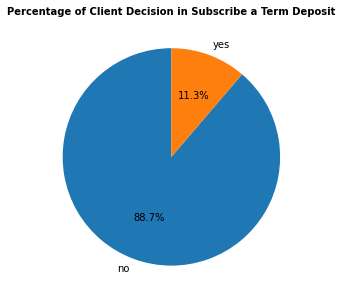

In [13]:
plt.figure(figsize=(5,5))
font = {'weight': 'bold','size': 10,}
ax = plt.axes()
labels=df['y'].unique()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab=plt.pie(df_decision, labels=labels, startangle=90,autopct='%1.1f%%')
plt.show()

Berdasarkan hasil diatas, informasi yang diketahui terdapat 11.3 % client yang memutuskan untuk menjadi nasabah di bank, sementara sisanya 88.7 % client memutuskan untuk tidak bergabung menjadi nasabah bank. Sehingga dapat disimpulkan bahwa teknik marketing melalui telepon ini kurang efektif untuk dilakukan.

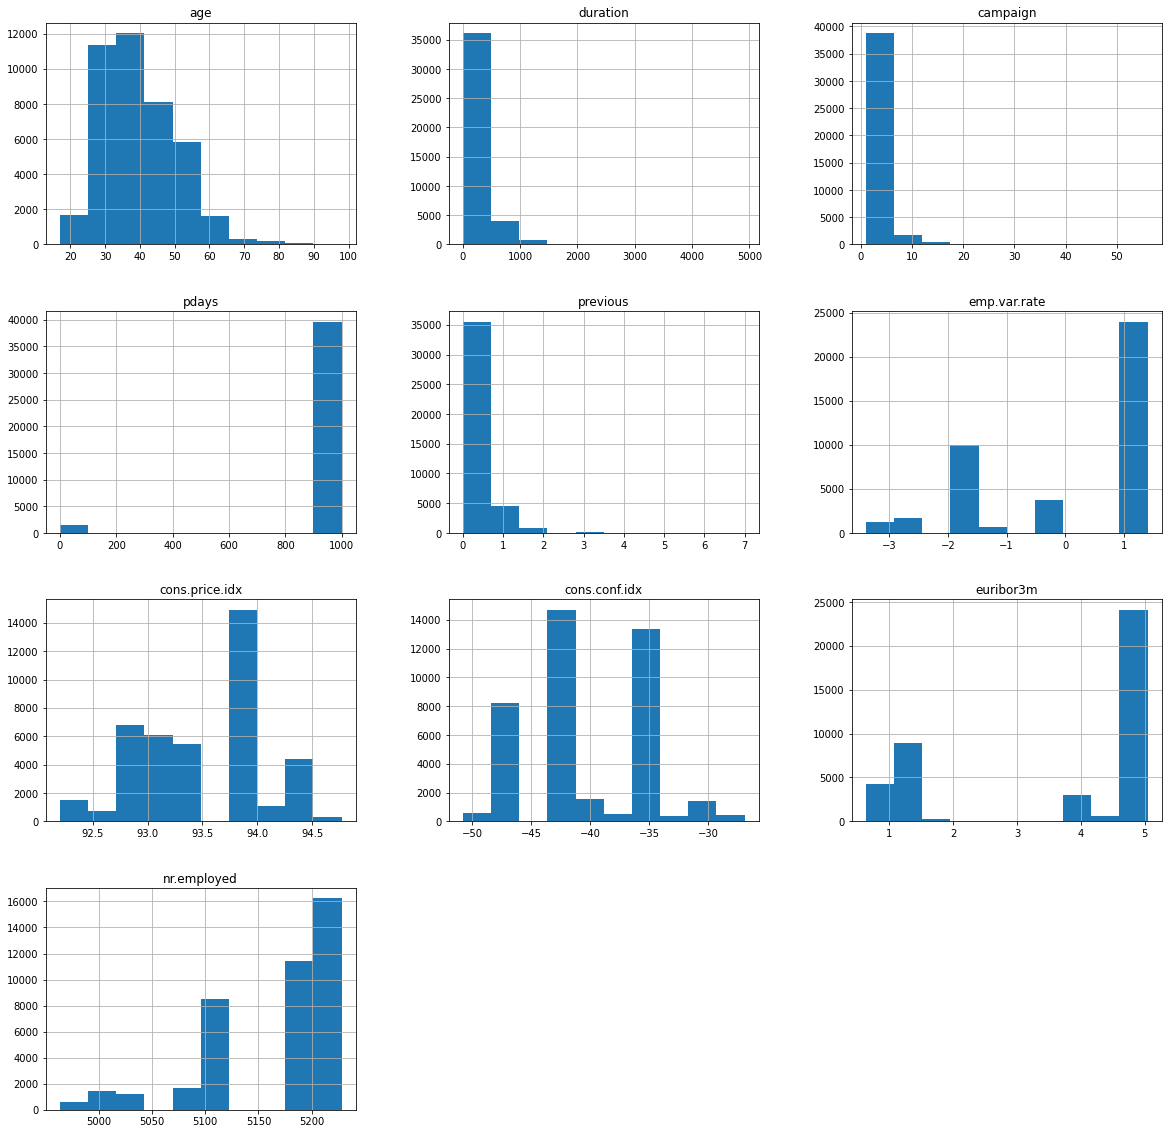

In [14]:
df.hist(figsize=(20,20))
plt.show()

## Data Preprocessing

In [15]:
from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

#### split data


In [16]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

#### Encoding

In [17]:
# Mengubah data categorical dan boolean menjadi numerical
le = preprocessing.LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])
for col in boolean:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])

In [18]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [19]:
# Menentukan x_train dan y_train
x_arr = df[features].to_numpy()
x_train = x_arr
y_arr = df['y'].astype('int')
y_arr = y_arr.to_numpy()
y_train = y_arr

In [20]:
# Menentukan x_test dan y_test
x_arr2 = df_test[features].to_numpy()
x_test = x_arr2
y_arr2 = df_test['y'].astype('int')
y_arr2 = y_arr2.to_numpy()
y_test = y_arr2

## Classification

### Logistic Regression

In [21]:
lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print(classification_report(y_test, lr_pred))
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.66      0.39      0.49       971

    accuracy                           0.90      8236
   macro avg       0.79      0.68      0.72      8236
weighted avg       0.89      0.90      0.89      8236

Accuracy: 0.9049295774647887


akurasi dari model cukup baik yaitu 90.4%

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


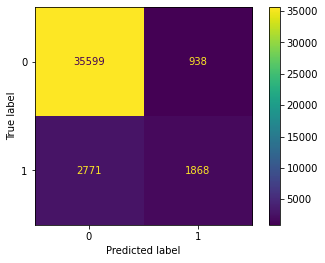

In [22]:
plot_confusion_matrix(lr, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

- 35599 prediksi true negatif : 35599 data prediksi benar dinyatakan sebagai nol
- 2771 prediksi false negatif: 2771 data prediksi salah dinyatakan sebagai nol.
- 938 prediksi false positif: 938 data prediksi salah dinyatakan sebagai satu.
- 1868 prediksi positif yang benar: 1868 data prediksi benar dinyatakan sebagai satu.

### K-Nearest Neighbor

In [23]:
error = []

In [24]:
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

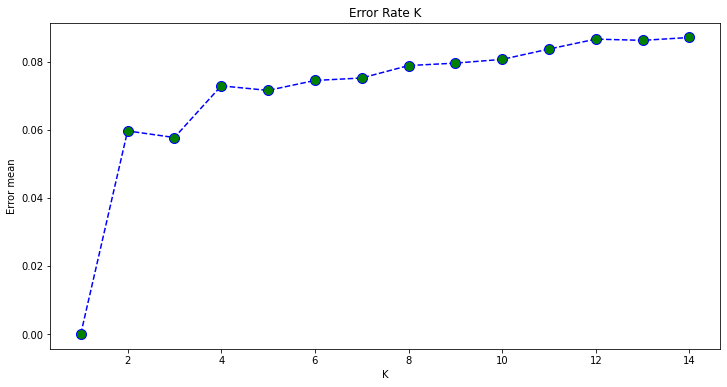

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

Berdasarkan angka Error Rate K, nilai K diputuskan pada angka 6 karena tidak ada peningkatan signifikan terhadap kesalahan berarti dari angka 7 ke atas.

In [26]:
knn2 = KNeighborsClassifier(n_neighbors=6)

# Melatih model dengan menggunakan data train
knn2.fit(x_train, y_train)

# Hasil predict
knn2_pred = knn2.predict(x_test)

print(classification_report(knn2_pred,y_test))
print("Accuracy:",metrics.accuracy_score(knn2_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7614
           1       0.50      0.79      0.62       622

    accuracy                           0.93      8236
   macro avg       0.74      0.86      0.79      8236
weighted avg       0.95      0.93      0.93      8236

Accuracy: 0.9255706653715395


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


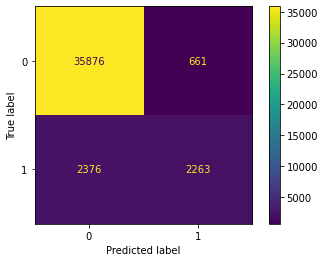

In [27]:
plot_confusion_matrix(knn2, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

- 35876 prediksi true negatif : 35876 data prediksi benar dinyatakan sebagai nol
- 2376 prediksi false negatif: 2376 data prediksi salah dinyatakan sebagai nol.
- 661 prediksi false positif: 661 data prediksi salah dinyatakan sebagai satu.
- 2263 prediksi positif yang benar: 2263 data prediksi benar dinyatakan sebagai satu.

### SVM

In [28]:
svm_model = LinearSVC()
svm_model.fit(x_train,y_train)

svm_score_train = svm_model.score(x_train, y_train)
print(svm_score_train)

0.9054060617835632


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
svm_pred = svm_model.predict(x_test)
print(classification_report(svm_pred,y_test))
print("Accuracy:",metrics.accuracy_score(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7722
           1       0.34      0.64      0.45       514

    accuracy                           0.90      8236
   macro avg       0.66      0.78      0.70      8236
weighted avg       0.94      0.90      0.91      8236

Accuracy: 0.9000728508984944


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


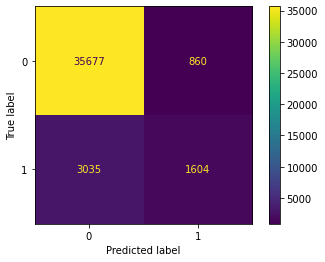

In [30]:
plot_confusion_matrix(svm_model, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

- 35677 prediksi true negatif : 35677 data prediksi benar dinyatakan sebagai nol
- 3035 prediksi false negatif: 3035 data prediksi salah dinyatakan sebagai nol.
- 860 prediksi false positif: 860 data prediksi salah dinyatakan sebagai satu.
- 1604 prediksi positif yang benar: 1604 data prediksi benar dinyatakan sebagai satu.

### Decision Tree

In [31]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [32]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=1, criterion='gini')

# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)

# Predict the response for test dataset
dt_pred = dt.predict(x_test)

print(classification_report(y_test, dt_pred))
print("Accuracy:",metrics.accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7265
           1       0.00      0.00      0.00       971

    accuracy                           0.88      8236
   macro avg       0.44      0.50      0.47      8236
weighted avg       0.78      0.88      0.83      8236

Accuracy: 0.8821029626032054


c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


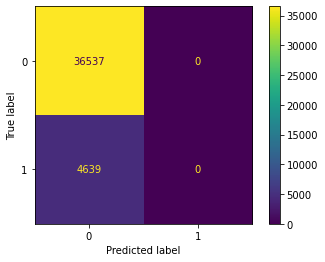

In [33]:
plot_confusion_matrix(dt, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

- 36537 prediksi true negatif : 36537 data prediksi benar dinyatakan sebagai nol
- 4639 prediksi false negatif: 4639 data prediksi salah dinyatakan sebagai nol.
- 0 prediksi false positif: 0 data prediksi salah dinyatakan sebagai satu.
- 0 prediksi positif yang benar: 0 data prediksi benar dinyatakan sebagai satu.

### Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators=100)
 
rf.fit(x_train,y_train) 

rf_pred = rf.predict(x_test)

print(classification_report(y_test, rf_pred))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7265
           1       1.00      1.00      1.00       971

    accuracy                           1.00      8236
   macro avg       1.00      1.00      1.00      8236
weighted avg       1.00      1.00      1.00      8236

Accuracy: 1.0


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang sangat baik yaitu 100%.

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


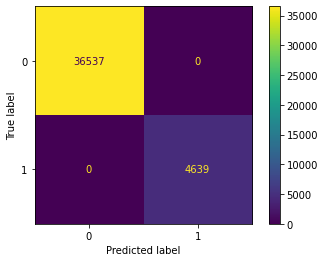

In [35]:
plot_confusion_matrix(rf, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

- 36537 prediksi true negatif : 36537 data prediksi benar dinyatakan sebagai nol
- 0 prediksi false negatif: 0 data prediksi salah dinyatakan sebagai nol.
- 0 prediksi false positif: 0 data prediksi salah dinyatakan sebagai satu.
- 4639 prediksi positif yang benar: 4639 data prediksi benar dinyatakan sebagai satu.

### Naive Bayes

In [36]:
nb = GaussianNB()

nb.fit(x_train,y_train)

nb_pred = nb.predict(x_test)

print(classification_report(y_test, nb_pred))
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      7265
           1       0.38      0.57      0.46       971

    accuracy                           0.84      8236
   macro avg       0.66      0.72      0.68      8236
weighted avg       0.87      0.84      0.85      8236

Accuracy: 0.8392423506556581


Berdasarkan hasil dan tabel classification_report di atas, didapatkan hasil akurasi model yang cukup baik walaupun tidak setinggi model sebelumnya yaitu 84,6%.

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


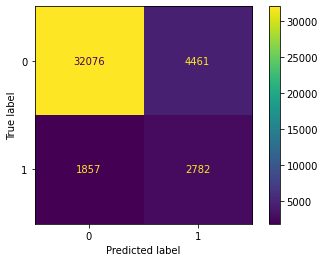

In [37]:
plot_confusion_matrix(nb, x_train, y_train)

Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:

- 32076 prediksi true negatif : 32076 data prediksi benar dinyatakan sebagai nol
- 1857 prediksi false negatif: 1857 data prediksi salah dinyatakan sebagai nol.
- 4461 prediksi false positif: 4461 data prediksi salah dinyatakan sebagai satu.
- 2782 prediksi positif yang benar: 2782 data prediksi benar dinyatakan sebagai satu.

## Kesimpulan

1. Terdapat 11.3 % client yang memutuskan untuk menjadi nasabah di bank, sementara sisanya 88.7 % client memutuskan untuk tidak bergabung menjadi nasabah bank. Sehingga dapat disimpulkan bahwa teknik marketing melalui telepon ini kurang efektif untuk dilakukan.
2. Dari beberapa pemodelan Machine Learning yang sudah dilakukan, semuanya memiliki akurasi yang cukup baik. Adapun hasil akurasi dari model-model Machine Learning yang digunakan :
Logistic Regression = 90,4%
K-Nearest Neighbour = 92,5%
Support Vector Machine = 90%
Decision Tree = 88.2%
Random Forest = 100%
Naive Bayes = 84,6%
3. Meskipun akurasi dari setiap model yang digunakan cukup baik, akan tetapi nilai precision, recall, dan f1-score untuk salah satu kelas variabel target masih kurang baik. Hal ini dapat disebabkan karena adanya ketidakseimbangan data target (imbalance data) sehingga perlu dilakukan eksplorasi yang lebih mendalam terhadap data pada tahap EDA.